In [1]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import copy
import math
import statsmodels.api as sm
from scipy.stats import anderson

In [69]:
0.2647 / 0.2406 * 100

110.01662510390689

In [2]:
#pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_pickle("../3.new_data/4C.df_structured_unstructured")

In [4]:
df.head()

,ISO_COUNTRY_CODE,CAE_TYPE,MAIN_ACTIVITY,B_ON_BEHALF,B_AWARDED_BY_CENTRAL_BODY,TYPE_OF_CONTRACT,TAL_LOCATION_NUTS,B_FRA_AGREEMENT,CPV,B_EU_FUNDS,TOP_TYPE,B_ACCELERATED,CRIT_CODE,CRIT_PRICE_WEIGHT,NUMBER_OFFERS,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO_FIN_1,DT_AWARD,LG_ORIG,short description,title,ac criterion,combined text,short_descr_criterion
0,BG,1,Other,N,N,W,BG315,N,45,N,OPE,N,M,100.0,2.0,12228.58,11473.18,2019-12-18,BG,Извършване на ремонт на сграда на районна пътн...,Ремонт на сграда на РПС — Луковит към ОПУ — Ловеч,Най-ниска цена,Извършване на ремонт на сграда на районна пътн...,Извършване на ремонт на сграда на районна пътн...
1,BG,3,General public\services,N,N,W,BG314,N,31,N,OPE,N,M,50.0,3.0,2671496.57,2657688.93,2019-12-02,BG,Изготвяне на работен инвестиционен проект.,"Инженеринг — проектиране, упражняване на автор...",Срок за изпълнение Гаранционен срок,Изготвяне на работен инвестиционен проект. Сро...,Изготвяне на работен инвестиционен проект. Сро...
2,BG,1,Other,N,N,W,BG422,N,45,N,OPE,N,M,40.0,3.0,3067798.34,3058417.95,2019-12-09,BG,Обхватът на обществената поръчка включва следн...,"Инженеринг (проектиране, строителство и осъщес...",Оценка на техническото предложение Подпоказате...,Обхватът на обществената поръчка включва следн...,Обхватът на обществената поръчка включва следн...
3,GR,8,Health,N,N,U,EL434,N,38,N,OPE,N,M,100.0,1.0,242134.07,237356.48,2019-09-02,EL,«Συσκευές ανάλυσης για ανοσολογικές εξετάσεις ...,«Συσκευές ανάλυσης για ανοσολογικές εξετάσεις ...,Συμφωνία προσφοράς με τις τεχνικές προδιαγραφέ...,«Συσκευές ανάλυσης για ανοσολογικές εξετάσεις ...,«Συσκευές ανάλυσης για ανοσολογικές εξετάσεις ...
4,PL,3,General public\services,N,N,U,PL623,N,48,Y,OPE,N,M,60.0,3.0,389196.49,442493.81,2019-12-23,PL,Celem zamówienia realizowanego w ramach zadani...,"„Dostawa sprzętu komputerowego”, realizowanego...",Gwarancja,Celem zamówienia realizowanego w ramach zadani...,Celem zamówienia realizowanego w ramach zadani...


In [5]:
df.loc[df["AWARD_EST_VALUE_EURO"] == max(df["AWARD_EST_VALUE_EURO"].values)]
df = df.drop(labels = [12416], axis = 0)

c:\Users\gbolton\OneDrive\Thesis\.venv2\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\gbolton\OneDrive\Thesis\.venv2\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


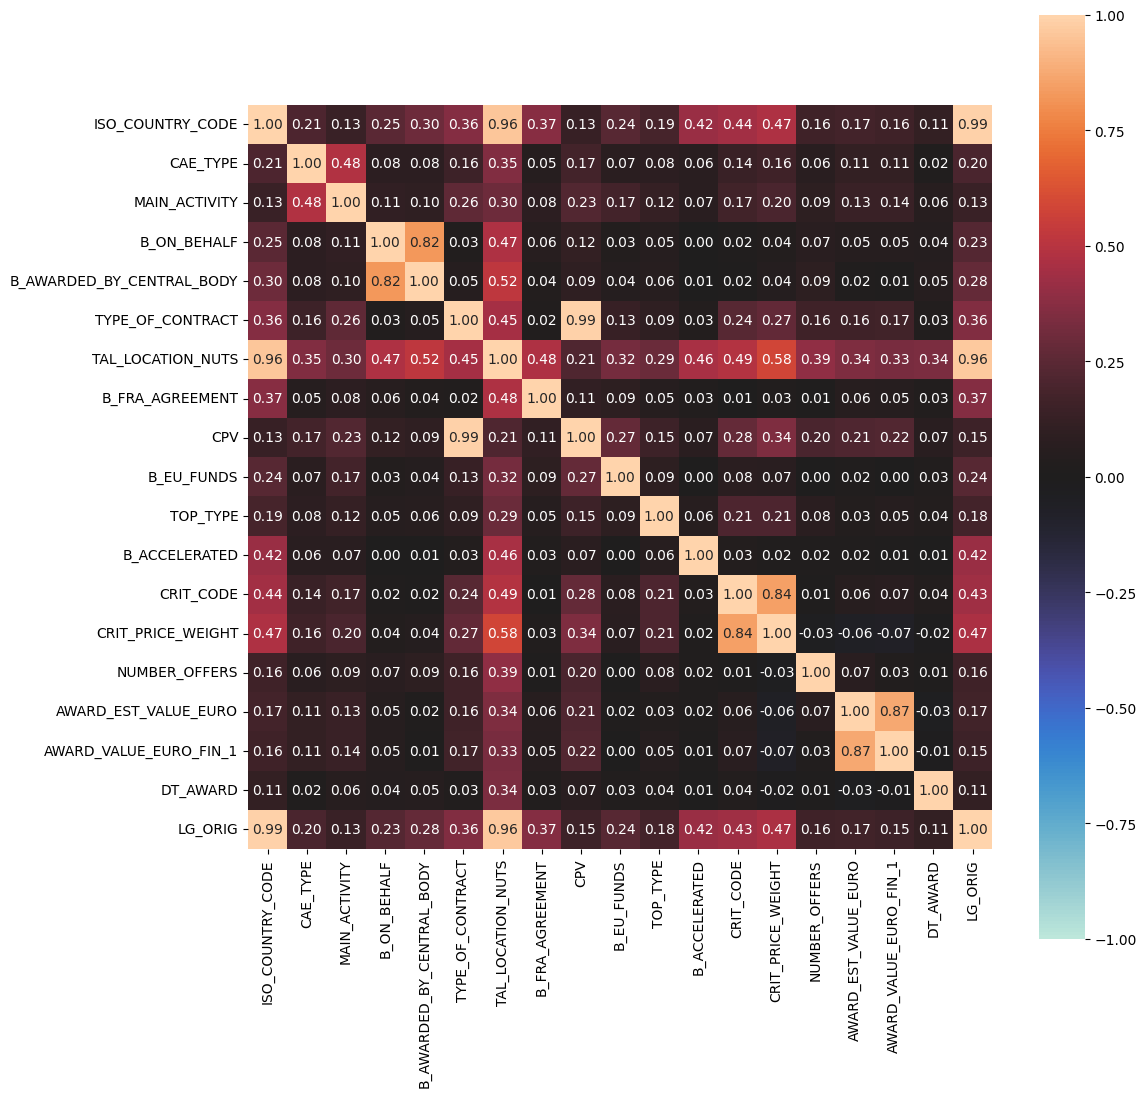

In [6]:
#create a correlation plot between the categorical columns
numeric_cols = ["CRIT_PRICE_WEIGHT", "NUMBER_OFFERS", "AWARD_EST_VALUE_EURO", "AWARD_VALUE_EURO_FIN_1"]
text_cols = ["combined text", "short description", "title", "ac criterion", "combined text", "short_descr_criterion"]
categorical_cols = list(set(df.columns.tolist()) - set(numeric_cols) - set(text_cols))
df_complete_corr = associations(df.drop(columns = text_cols), filename="../6.figures & Stats/correlation_plot", figsize=(12,12))

In [7]:
def make_boxplots(df, columns):
    num_cols = len(columns)
    num_rows = math.ceil(math.sqrt(num_cols))
    num_cols_per_row = math.ceil(num_cols / num_rows)

    plt.figure(figsize=(15, 5 * num_rows))
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    for i, column in enumerate(columns):
        ax = axes[i]
        if i < num_cols:
            ax.boxplot(df[column])
            ax.set_title(column)
        else:
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

<Figure size 1500x1000 with 0 Axes>

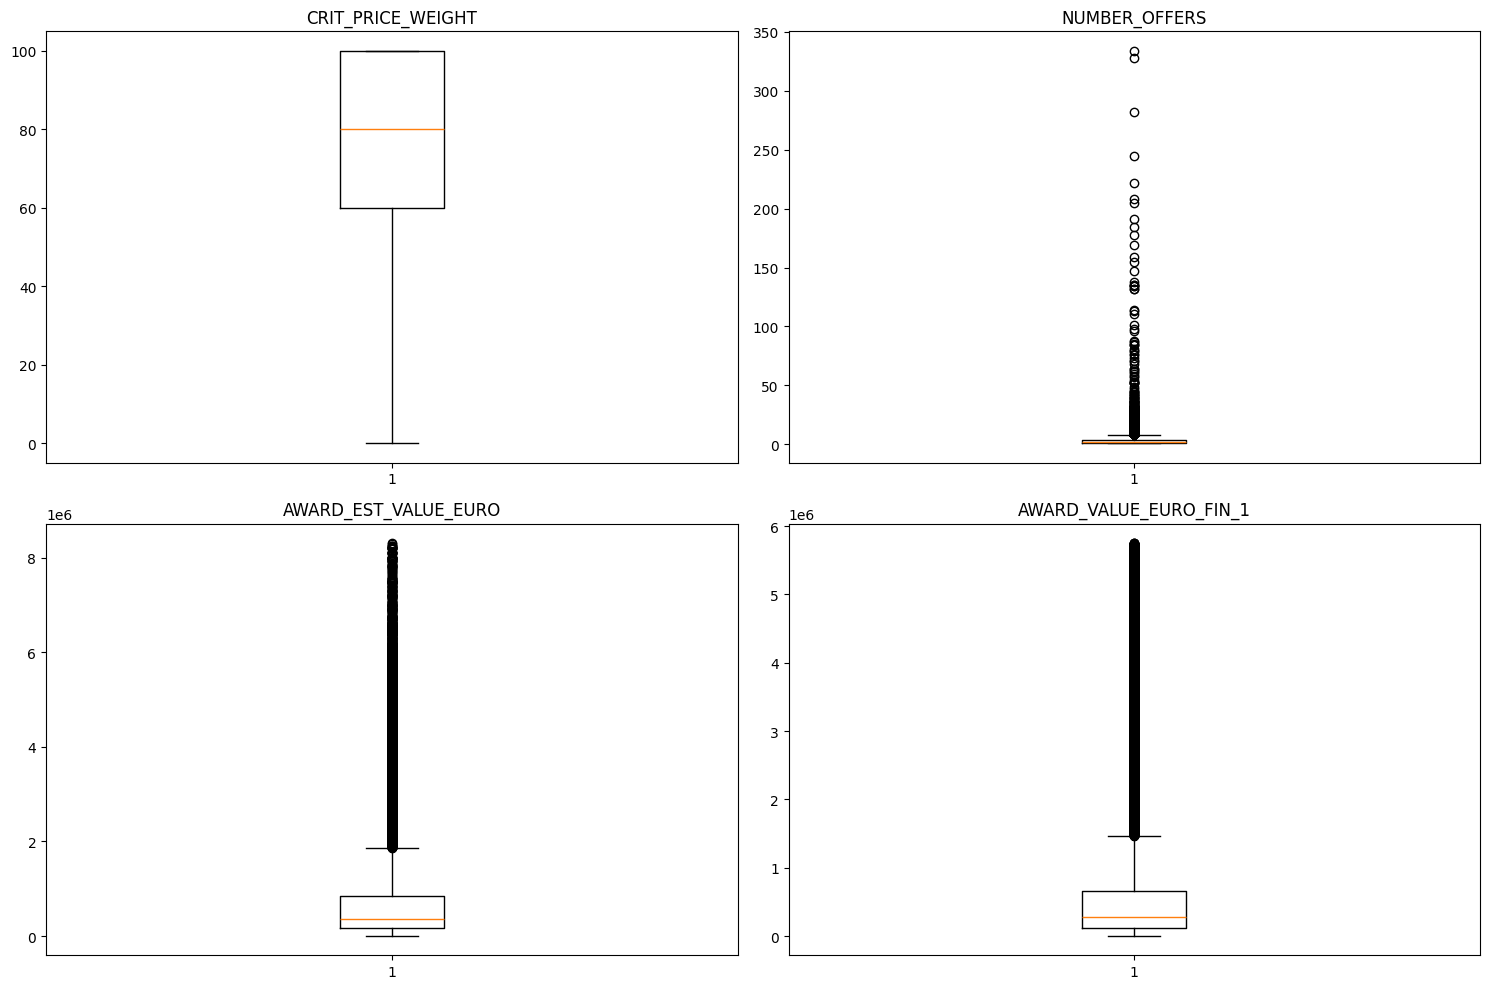

In [8]:
make_boxplots(df, columns = numeric_cols)

In [9]:
#get descriptive statistics
def get_descriptive_statistics(df, numeric_cols):
    numeric_df = df[numeric_cols]
    statistics_df = numeric_df.describe()
    return statistics_df

In [10]:
get_descriptive_statistics(df, numeric_cols)

,CRIT_PRICE_WEIGHT,NUMBER_OFFERS,AWARD_EST_VALUE_EURO,AWARD_VALUE_EURO_FIN_1
count,39141.000000,39141.000000,3.914100e+04,3.914100e+04
mean,75.872665,3.513477,7.940319e+05,6.200012e+05
std,25.572017,6.055298,1.159990e+06,9.240358e+05
min,0.000000,1.000000,9.585420e+03,7.833330e+03
25%,60.000000,1.000000,1.726919e+05,1.209282e+05
50%,80.000000,2.000000,3.630600e+05,2.837791e+05
75%,100.000000,4.000000,8.523502e+05,6.616789e+05
max,100.000000,334.000000,8.302449e+06,5.750000e+06


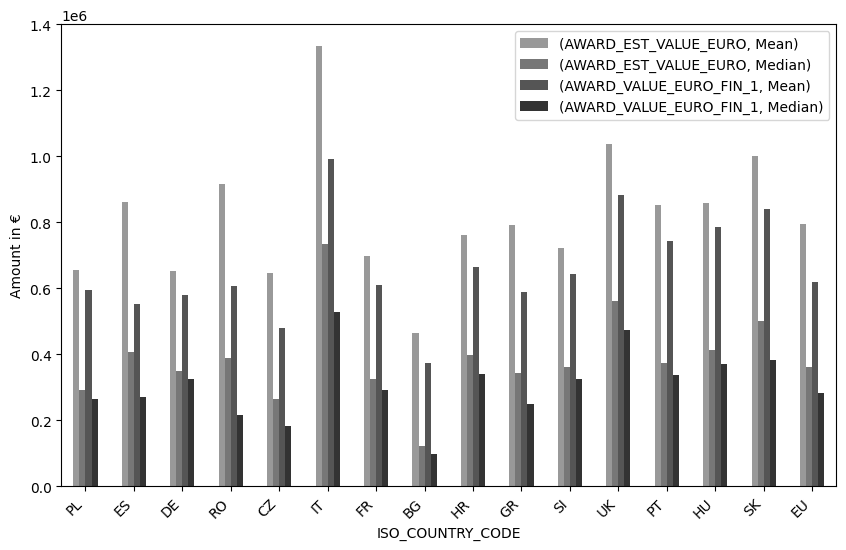

In [11]:
def plot_numeric_per_country(df, numeric_cols, filter_col):
    numeric_per_country = {}

    # Filter countries based on a threshold (0.01 * len(df))
    countries = [country for country, count in df[filter_col].value_counts().items() if count > 0.01 * len(df)]
    gray_colors = ['#999999', '#777777', '#555555', '#333333']
    
    for country in countries:
        numeric_values = []
        for col in numeric_cols:
            # Calculate mean and median for each numeric column for the current country
            mean_value = np.mean(df[col].loc[df[filter_col] == country].values)
            median_value = np.median(df[col].loc[df[filter_col] == country].values)
            numeric_values.extend([mean_value, median_value])

        numeric_per_country[country] = numeric_values
    
    numeric_values = []
    mean_value_est = np.mean(df["AWARD_EST_VALUE_EURO"].values)
    median_value_est = np.median(df["AWARD_EST_VALUE_EURO"].values)
    mean_value = np.mean(df["AWARD_VALUE_EURO_FIN_1"].values)
    median_value = np.median(df["AWARD_VALUE_EURO_FIN_1"].values)
    
    numeric_values.extend([mean_value_est, median_value_est, mean_value, median_value])
    numeric_per_country["EU"] = numeric_values

    # Create a new DataFrame from the values dictionary
    values_df = pd.DataFrame(numeric_per_country).T
    values_df.columns = pd.MultiIndex.from_product([numeric_cols, ['Mean', 'Median']])
    countries.append("EU")
    # Plot grouped bar graph
    ax = values_df.plot(kind='bar', stacked=False, figsize=(10, 6), color = gray_colors)
    ax.set_xticklabels(countries, rotation=45, ha='right')
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Amount in €')
    ax.legend(title="")
    # Show the plot
    plt.show()

plot_numeric_per_country(df, ['AWARD_EST_VALUE_EURO', 'AWARD_VALUE_EURO_FIN_1'], 'ISO_COUNTRY_CODE')

In [62]:
def plot_categorical(df, target_col, filter_col, absolute, title, figsize, x_axis_title, 
                     y_axis_title, selected_countries = None, hor = True, save=True, angle = 0, label_encoding=None, legend = True,
                     x_label_size = None, y_label_size = None):
    
    save_path = f"../6.figures & Stats/{title}.png"

    gray_colors = ['#D3D3D3', '#808080', '#333333']
    combined_percentages = pd.DataFrame()

    if selected_countries:
        for country in selected_countries:
            if not absolute:
                specific_country_counts = df[target_col].loc[df[filter_col] == country].value_counts(normalize=True) * 100
                combined_percentages[country] = specific_country_counts
                all_countries_counts = df[target_col].value_counts(normalize=True) * 100
                combined_percentages["EU"] = all_countries_counts
            else:
                specific_country_counts = df[target_col].loc[df[filter_col] == country].value_counts()
                combined_percentages[country] = specific_country_counts
                all_countries_counts = df[target_col].value_counts()
                combined_percentages['EU'] = all_countries_counts
    else:
        all_countries_counts = df[target_col].value_counts()
        combined_percentages["EU"] = all_countries_counts

    if hor == True:
        kind = "bar"
    else:
        kind = "barh"

    if legend:
        legend == False
    # Plot grouped bar graph with adjusted bar width and explicit column order
    ax = combined_percentages.plot(kind=kind, figsize=figsize, width=0.8, color=gray_colors, legend = legend)
    if label_encoding:
        labels = [label_encoding[label] for label in combined_percentages.index.astype(str).to_list()]
    else:
        labels = ax.get_xticklabels()
        
    ax.set_xlabel(x_axis_title, fontsize = 12)
    ax.set_xticklabels(labels = labels, rotation=angle, ha="right", fontsize = x_label_size)
    ax.set_ylabel(y_axis_title, fontsize = 12)
    ax.tick_params(axis='y', labelsize=y_label_size)
    if legend:
        ax.legend()

    if save == True:
        plt.savefig(save_path)
    plt.show()

C:\Users\gbolton\AppData\Local\Temp\ipykernel_27180\1749461993.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = labels, rotation=angle, ha="right", fontsize = x_label_size)


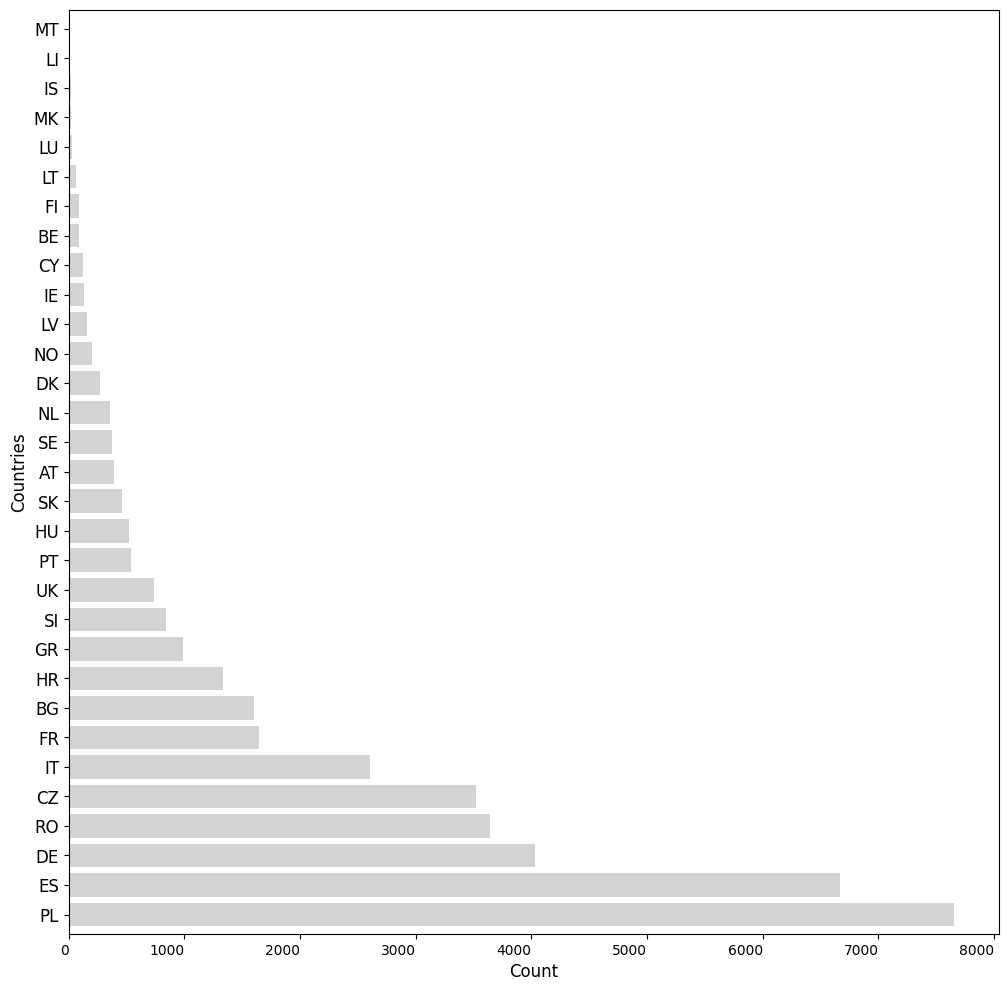

In [63]:
plot_categorical(df, 
                 target_col="ISO_COUNTRY_CODE",
                 filter_col = "ISO_COUNTRY_CODE",
                 absolute=False,
                 x_axis_title="Count",
                 y_axis_title="Countries",
                 title = "Distribution across countries",
                 figsize = (12,12),
                 hor = False,
                 legend = False,
                 x_label_size = 10,
                 y_label_size = 12)

C:\Users\gbolton\AppData\Local\Temp\ipykernel_27180\1749461993.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = labels, rotation=angle, ha="right", fontsize = x_label_size)


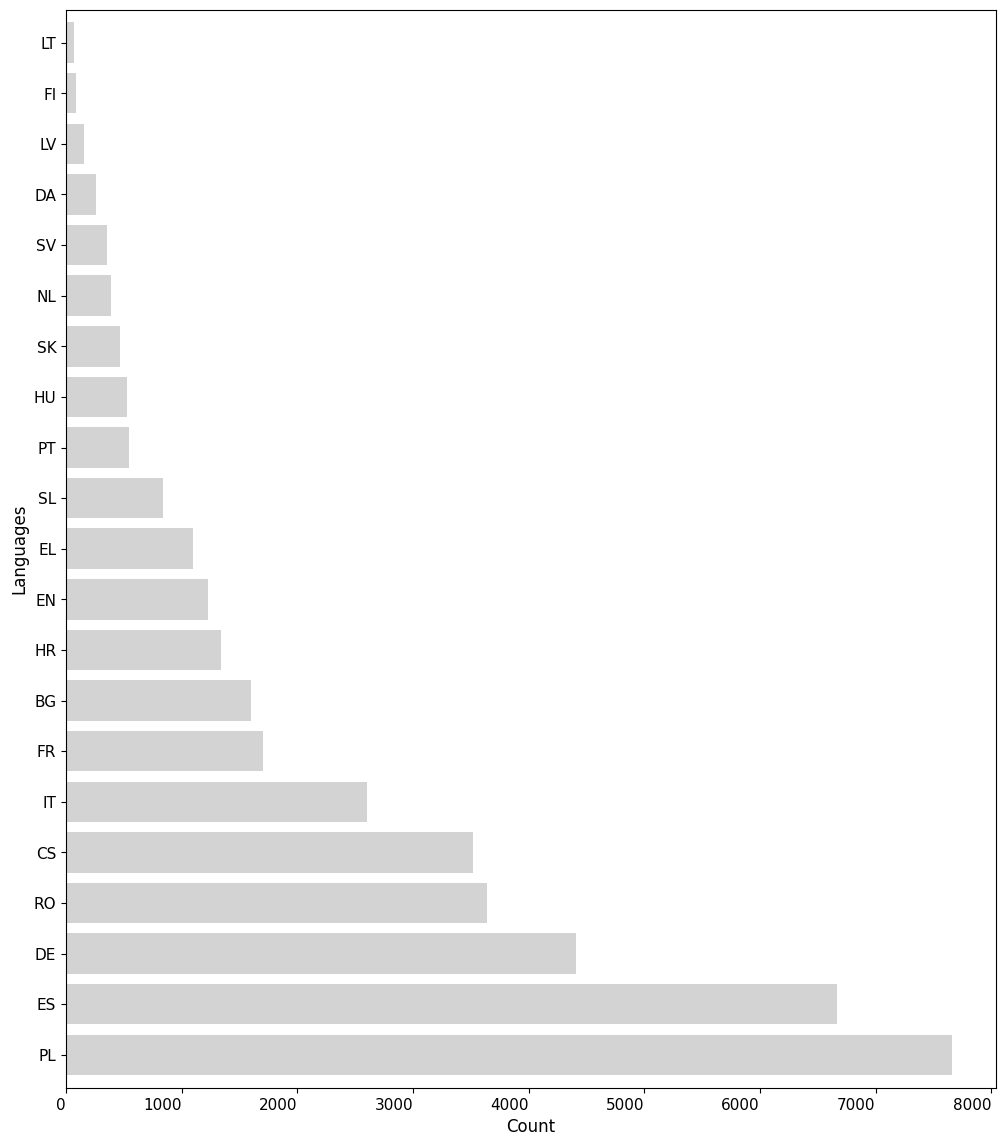

In [67]:
plot_categorical(df, 
                 target_col="LG_ORIG",
                 filter_col = "LG_ORIG",
                 absolute=False,
                 x_axis_title="Count",
                 y_axis_title="Languages",
                 title = "Distribution across languages",
                 figsize = (12,14),
                 hor = False,
                 legend = False,
                 x_label_size=11,
                 y_label_size=11,
                 )

C:\Users\gbolton\AppData\Local\Temp\ipykernel_27180\1749461993.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = labels, rotation=angle, ha="right", fontsize = x_label_size)


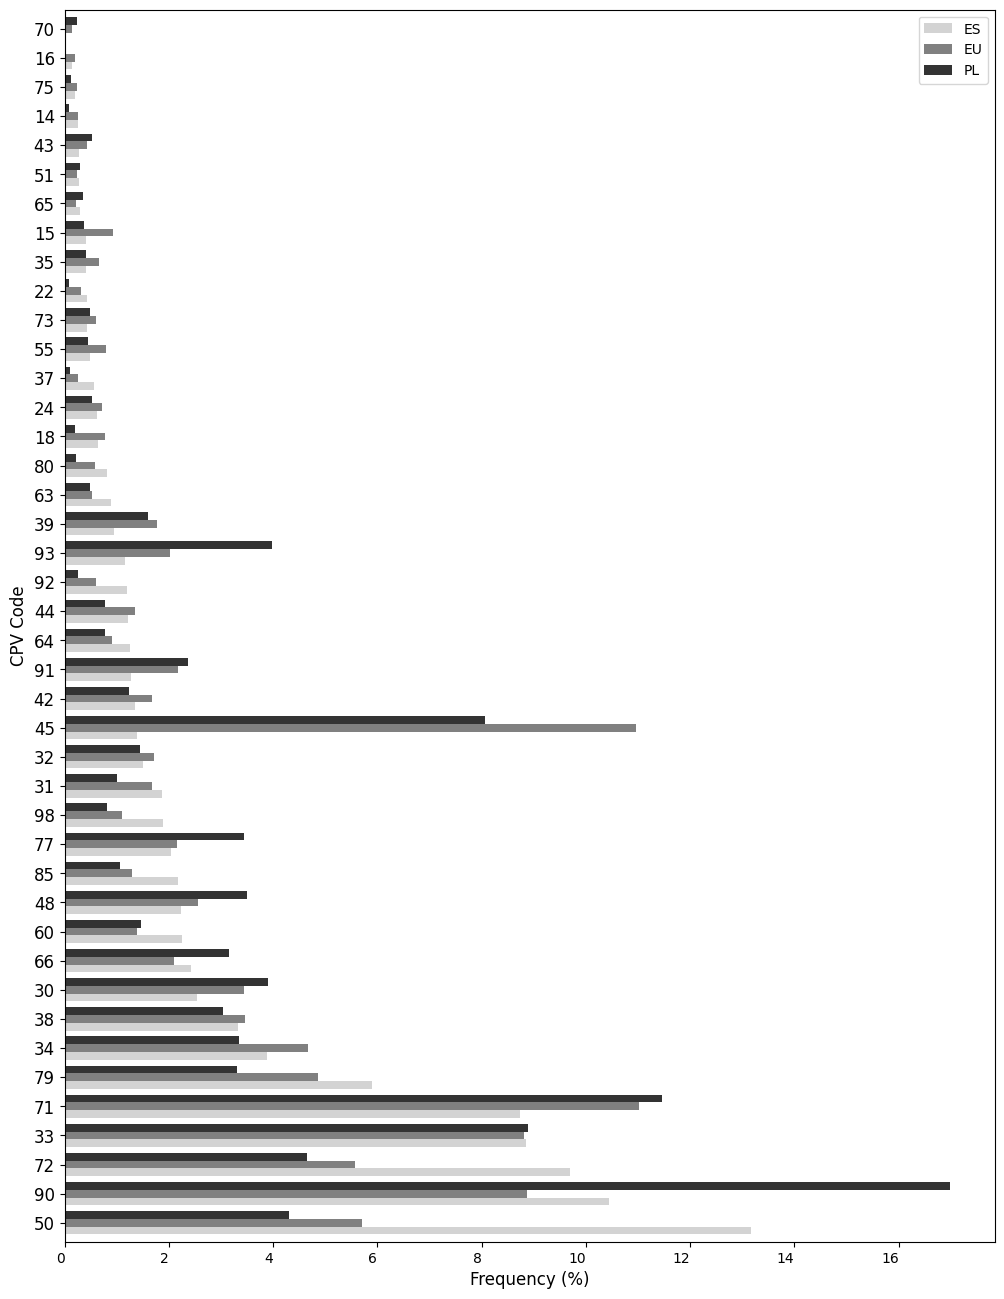

In [65]:
plot_categorical(df, 
                     target_col="CPV",
                     filter_col = "ISO_COUNTRY_CODE",
                     selected_countries=['ES', 'PL'],
                     absolute=False,
                     x_axis_title="Frequency (%)",
                     y_axis_title="CPV Code",
                     title = "CPV Code Distribution for Spanish, Polish and all EU Tenders",
                     figsize = (12,16),
                     hor = False,
                     y_label_size = 12)

In [277]:
cpv_codes = ["93", "45", "79", "72", "90", "50"]
total_procurement_value_ES = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[df["ISO_COUNTRY_CODE"] == "ES"].values)
total_procurement_value_PL = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[df["ISO_COUNTRY_CODE"] == "PL"].values)
values = {"ES": 0,
          "PL": 0}

for country in ["ES", "PL"]:
    total = 0 
    for cpv_code in cpv_codes:
        total += sum(df["AWARD_VALUE_EURO_FIN_1"].loc[(df["ISO_COUNTRY_CODE"] == country) &
                                         (df["CPV"] == cpv_code)].values)
    values[country] = total

print(values["ES"] / total_procurement_value_ES * 100, "\n\n",
values["PL"] / total_procurement_value_PL * 100)

48.83049706461466 

 54.975356551037436


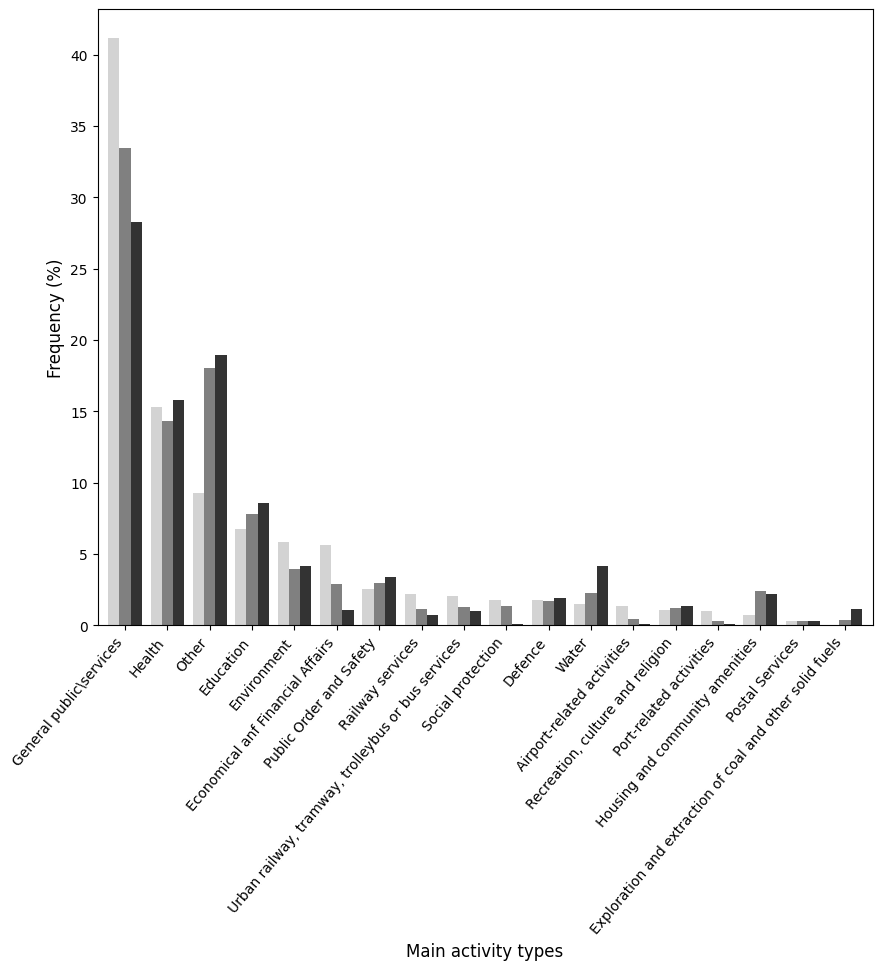

In [48]:
plot_categorical(df, 'MAIN_ACTIVITY', filter_col = "ISO_COUNTRY_CODE",
                     selected_countries = ['ES', "PL"], 
                     title = "Distribution of contracting authority activity types",
                     x_axis_title = "Main activity types",
                     y_axis_title = "Frequency (%)",
                     figsize = (10, 8),
                     absolute=False,
                     angle = 50)

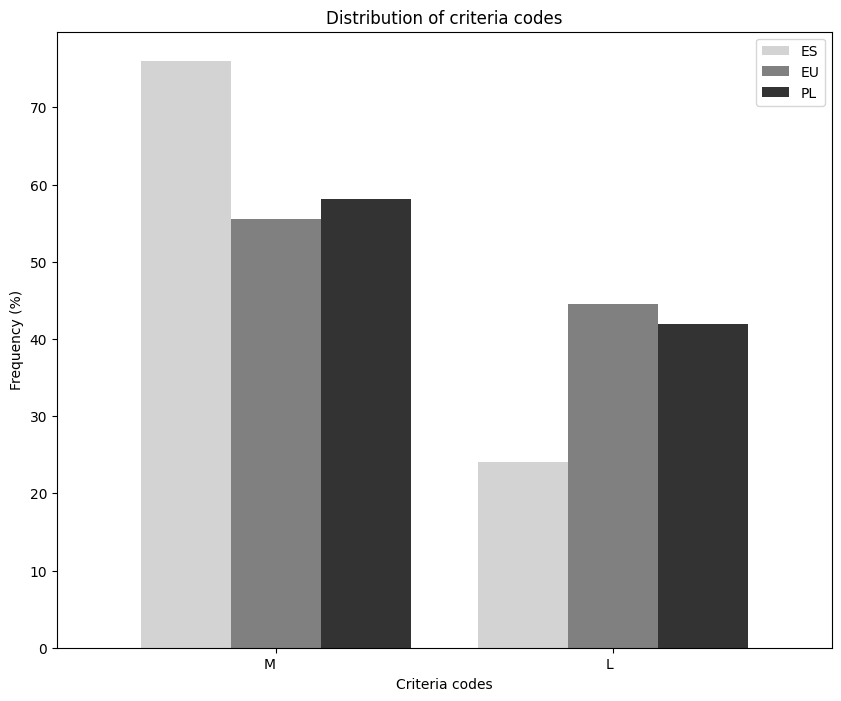

In [279]:
plot_categorical(df, 
                 target_col='CRIT_CODE', 
                 filter_col = "ISO_COUNTRY_CODE",
                 selected_countries = ['ES', "PL"], 
                 title = "Distribution of criteria codes",
                 x_axis_title = "Criteria codes",
                 y_axis_title = "Frequency (%)",
                 figsize = (10, 8),
                 absolute=False,
                 angle = 0)

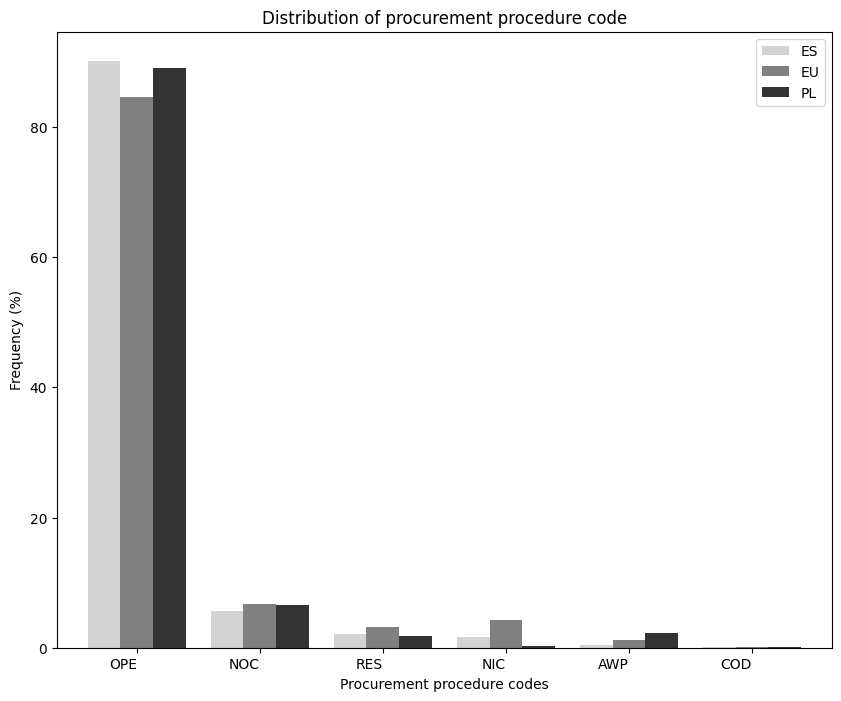

In [180]:
plot_categorical(df, 
                 target_col='TOP_TYPE', 
                 filter_col = "ISO_COUNTRY_CODE",
                 selected_countries = ['ES', "PL"], 
                 title = "Distribution of procurement procedure code",
                 x_axis_title = "Procurement procedure codes",
                 y_axis_title = "Frequency (%)",
                 figsize = (10, 8),
                 absolute=False,
                 angle = 0)

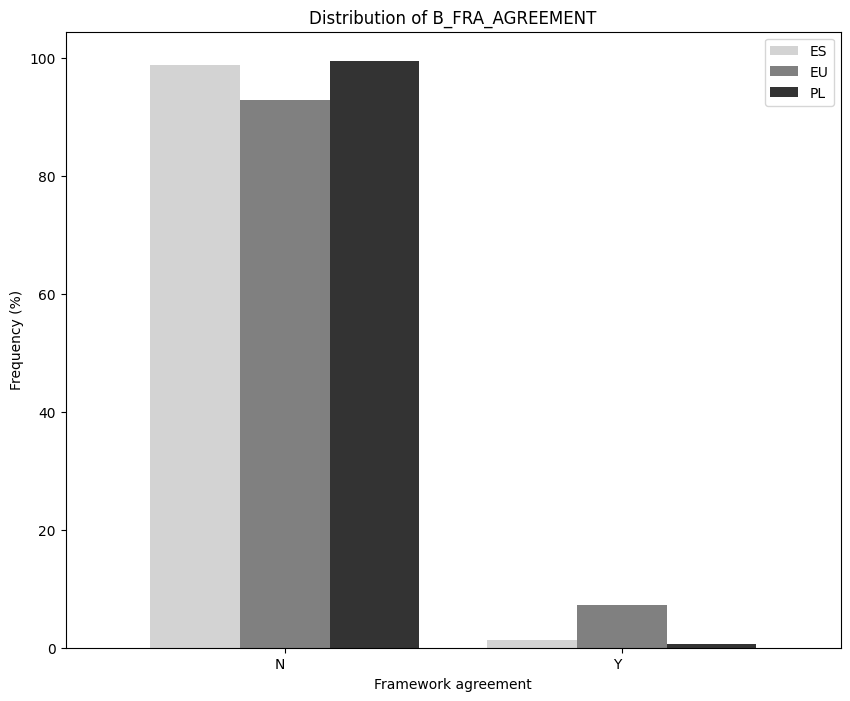

In [181]:
plot_categorical(df, 
                 target_col='B_FRA_AGREEMENT', 
                 filter_col = "ISO_COUNTRY_CODE",
                 selected_countries = ['ES', "PL"], 
                 title = "Distribution of B_FRA_AGREEMENT",
                 x_axis_title = "Framework agreement",
                 y_axis_title = "Frequency (%)",
                 figsize = (10, 8),
                 absolute=False,
                 angle = 0)

In [205]:
category_mapping = {
    '1': "Ministry or any other national or federal authority, including their regional of local subdivisions",
    '3': 'Regional or local authority',
    '4': 'Utilities sectors',
    '5': 'European Union institution/agency',
    '5A': 'Other international organization',
    '6': 'Body governed by public law',
    '8': 'Other',
    'N': 'National or federal Agency / Office',
    'R': 'Regional or local Agency / Office',
    'Z': 'Not specified'
}

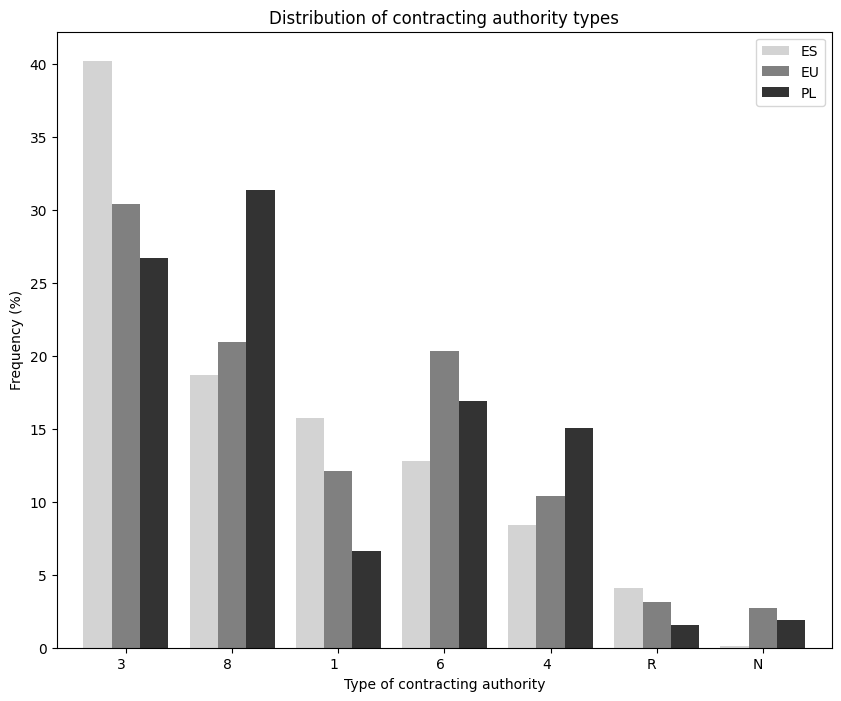

In [209]:
plot_categorical(df, 
                 target_col='CAE_TYPE', 
                 filter_col = "ISO_COUNTRY_CODE",
                 selected_countries = ['ES', "PL"], 
                 title = "Distribution of contracting authority types",
                 x_axis_title = "Type of contracting authority",
                 y_axis_title = "Frequency (%)",
                 figsize = (10, 8),
                 absolute=False,
                 angle = 0)

In [272]:
def one_hot_encode_corr(df, vmin, vmax, title, columns):
    
    df = pd.get_dummies(df[columns + ["AWARD_VALUE_EURO_FIN_1"]], columns=columns, drop_first=False)
    df_corr = df.corr()
    df_corr = df_corr.drop(columns = [col for col in df_corr.columns if col != "AWARD_VALUE_EURO_FIN_1"])
    df_corr = df_corr.drop(labels=["AWARD_VALUE_EURO_FIN_1"])
    plt.figure(figsize=(12, 14))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=vmin, vmax=vmax)
    save_path = f"../6.figures & Stats/{title}.png"
    plt.savefig(save_path)
    plt.show()
    
    return df_corr

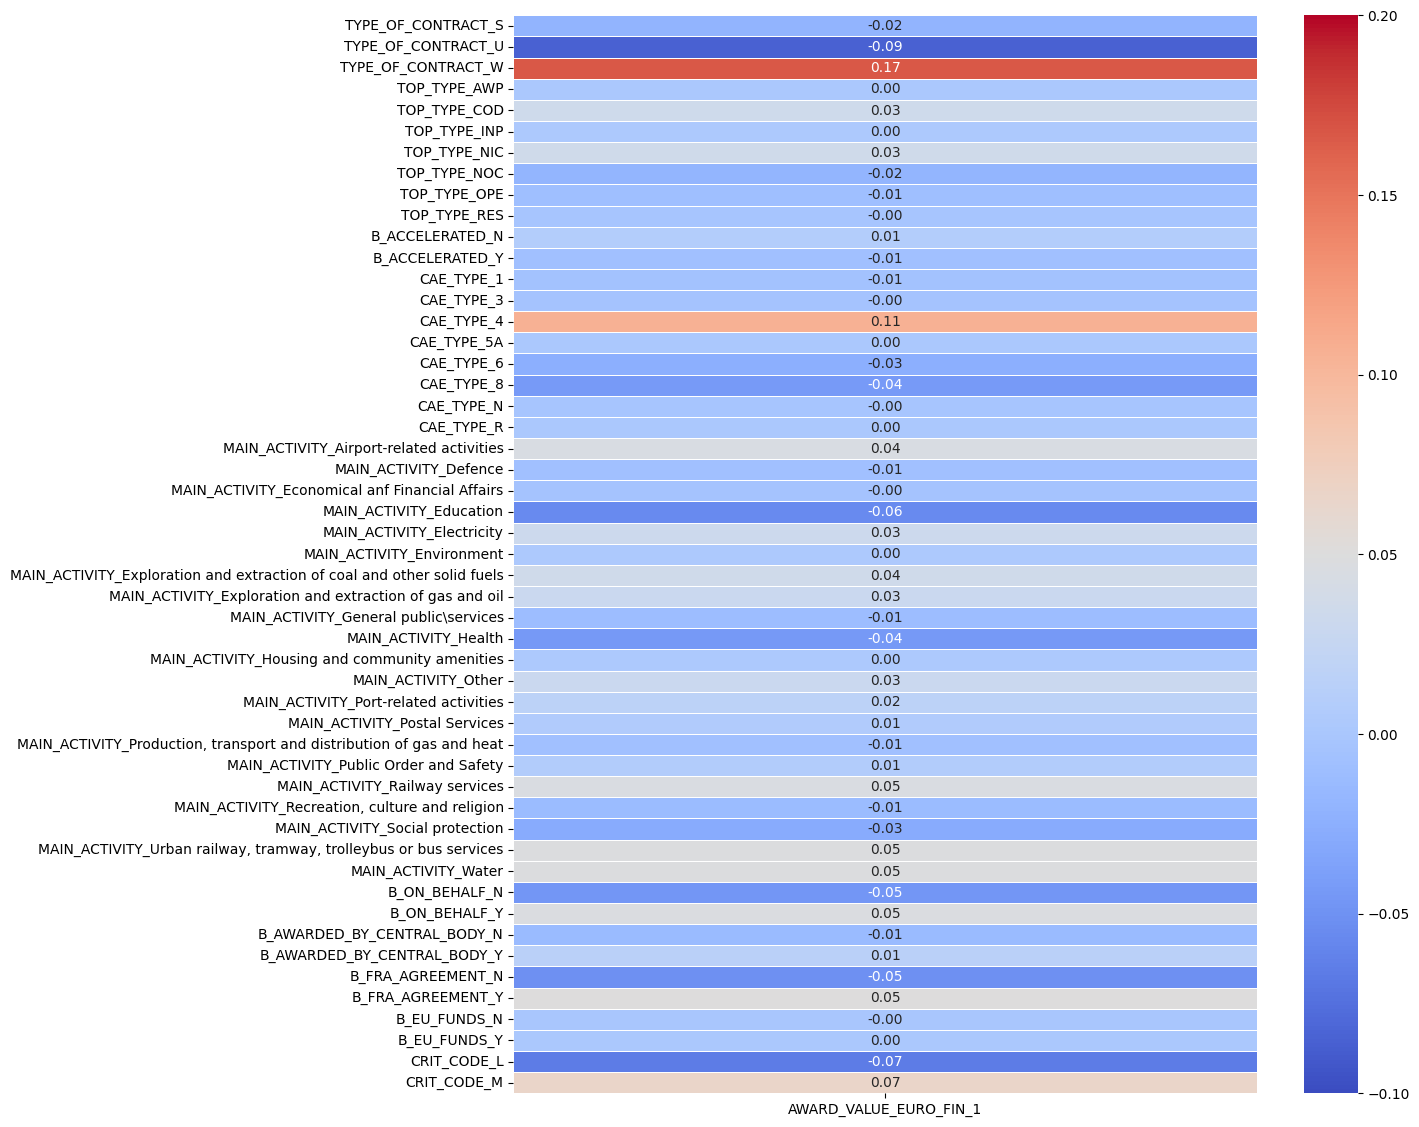

In [273]:
one_hot_cols_no_cpv = ["TYPE_OF_CONTRACT", "TOP_TYPE", "B_ACCELERATED", "CAE_TYPE", "MAIN_ACTIVITY", "B_ON_BEHALF", 
                "B_AWARDED_BY_CENTRAL_BODY", "B_FRA_AGREEMENT", "B_EU_FUNDS", "CRIT_CODE"]

df_corr_no_cpv = one_hot_encode_corr(df, vmin=-0.1, vmax=0.2, title = "corr_plot_cat_no_cpv", columns=one_hot_cols_no_cpv)

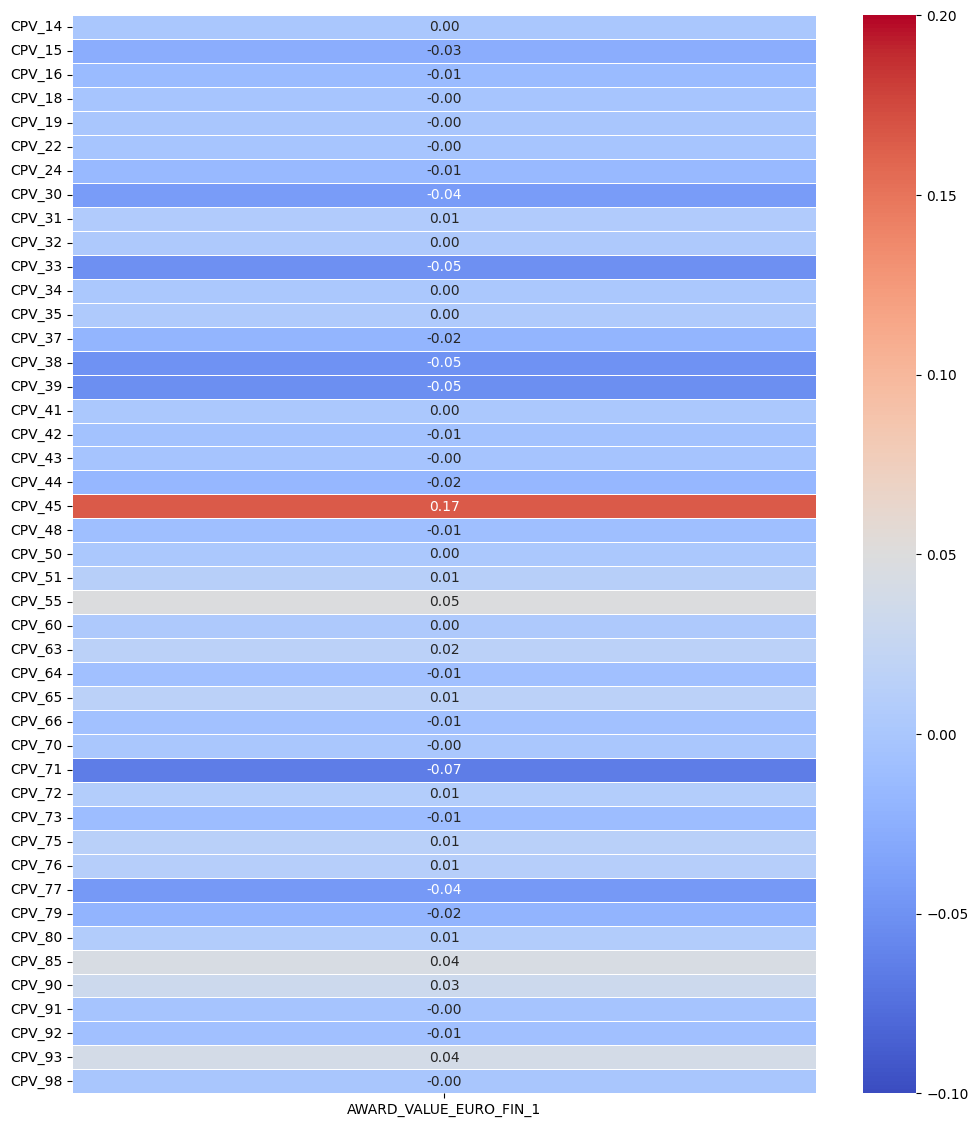

In [274]:
df_corr_cpv = one_hot_encode_corr(df, vmin=-0.1, vmax=0.2, columns = ["CPV"], title = "corr_plot_cpv")

In [216]:
value_procurement_national_government_value_ES = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[(df["CAE_TYPE"] == "3") &
                                                                                      (df["ISO_COUNTRY_CODE"] == "ES")].values)
value_procurement_national_government_value_PL = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[(df["CAE_TYPE"] == "3") &
                                                                  (df["ISO_COUNTRY_CODE"] == "PL")].values)

total_procurement_value_ES = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[df["ISO_COUNTRY_CODE"] == "ES"].values)
total_procurement_value_PL = sum(df["AWARD_VALUE_EURO_FIN_1"].loc[df["ISO_COUNTRY_CODE"] == "PL"].values)

print(value_procurement_national_government_value_ES / total_procurement_value_ES , "\n\n",
      value_procurement_national_government_value_PL /total_procurement_value_PL )

0.3998676823234182 

 0.2896322866440224


In [ ]:
interesting_cols = ["MAIN_ACTIVITY", "CAE_TYPE", "B_FRA_AGREEMENT", "CRIT_CODE", "TOP_TYPE"]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_categorical_bar_plots(df, categorical_columns, threshold=20):
    num_cols = len(categorical_columns)
    num_rows = (num_cols // 2) + (num_cols % 2)  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
    fig.suptitle("Bar Plots for categorical features", fontsize=16)

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    # Mapping dictionary for translating encoded labels to human-readable form
    label_mapping = {
        'MAIN_ACTIVITY': {'Soc': 'Social Protection', 'Hea': 'Health', 'Eco': 'Economic affairs', 'Gen': 'General public services',
                          'Edu': 'Education', 'Pub': 'Public order and safety', 'Def': 'Defense', 'Rec': 'Recreation, culture and religion',
                          'Env': 'Environmental protection', 'Hou': 'Housing and community amenities', 'Oth': 'Other', 'Unk': 'Unknown'},
        'TYPE_OF_CONTRACT': {'U': 'Utilities', 'S': 'Services', 'W': 'Works'},
        'TOP_TYPE': {'OPE': 'Open procedure', 'RES': 'Restricted procedure', 'COD': 'Competitive dialogue',
                     'INP': 'Innovation partnership', 'AWP': 'Award without prior publication of a contract notice',
                     'NOC/NOP': 'Negotiated without a call for competition', 'NIC/NIP': 'Negotiated with a call for competition'},
        'CAE_TYPE': {'1': 'Ministry or any other national or federal authority, including their regional or local subdivisions',
                     '3': 'Regional or local authority', '4': 'Utilities sectors', '5': 'European Union institution/agency',
                     '5A': 'Other international organization', '6': 'Body governed by public law', '8': 'Other',
                     'N': 'National or federal Agency / Office', 'R': 'Regional or local Agency / Office', 'Z': 'Not specified'},
        'CRIT_CODE': {'L': 'Lowest price', 'M': 'Most economically advantageous tender (MEAT)'}
    }

    for i, column in enumerate(categorical_columns):
        ax = axes[i]

        # If the number of unique values is greater than the threshold, aggregate into "other"
        if df[column].nunique() > threshold:
            value_counts = df[column].value_counts()
            top_categories = value_counts.index[:threshold]
            df[column] = df[column].apply(lambda x: x if x in top_categories else 'other')

        # Translate the labels to human-readable form
        translated_labels = df[column].map(label_mapping.get(column, lambda x: x))

        sns.countplot(data=df, x=translated_labels, ax=ax, color='gray', order=translated_labels.value_counts().index)
        ax.set_title("Bar Plot for {}".format(column))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Remove empty subplots if there are any
    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout and avoid overlapping titles
    plt.show()

# Example usage:
# Assuming df is your DataFrame and categorical_columns is the set of categorical column names
# create_categorical_bar_plots(df, categorical_columns)


In [34]:
cat_cols_plot = ['B_EU_FUNDS',
 'TYPE_OF_CONTRACT',
 'B_FRA_AGREEMENT',
 'CAE_TYPE',
 'ISO_COUNTRY_CODE',
 'B_AWARDED_BY_CENTRAL_BODY',
 'B_ACCELERATED',
 'B_ON_BEHALF',
 'CRIT_CODE',
 'MAIN_ACTIVITY',
 'TOP_TYPE',
 'CPV',
 'LG_ORIG']

create_categorical_bar_plots(df,cat_cols_plot)

['B_EU_FUNDS',
 'TYPE_OF_CONTRACT',
 'B_FRA_AGREEMENT',
 'CAE_TYPE',
 'ISO_COUNTRY_CODE',
 'B_AWARDED_BY_CENTRAL_BODY',
 'B_ACCELERATED',
 'B_ON_BEHALF',
 'CRIT_CODE',
 'MAIN_ACTIVITY',
 'TAL_LOCATION_NUTS',
 'TOP_TYPE',
 'CPV',
 'LG_ORIG',
 'DT_AWARD']